### Processamento de Imagens - Atividade Avaliativa 4 - Luiz Ricardo Brumati De Lima - a2155184

### 1) Aplique o algoritmo de limiarização do Método de Otsu. Utilize-o nas imagens “harewood.jpg”, “nuts.jpg”, “snow.jpg” e “img_aluno”.

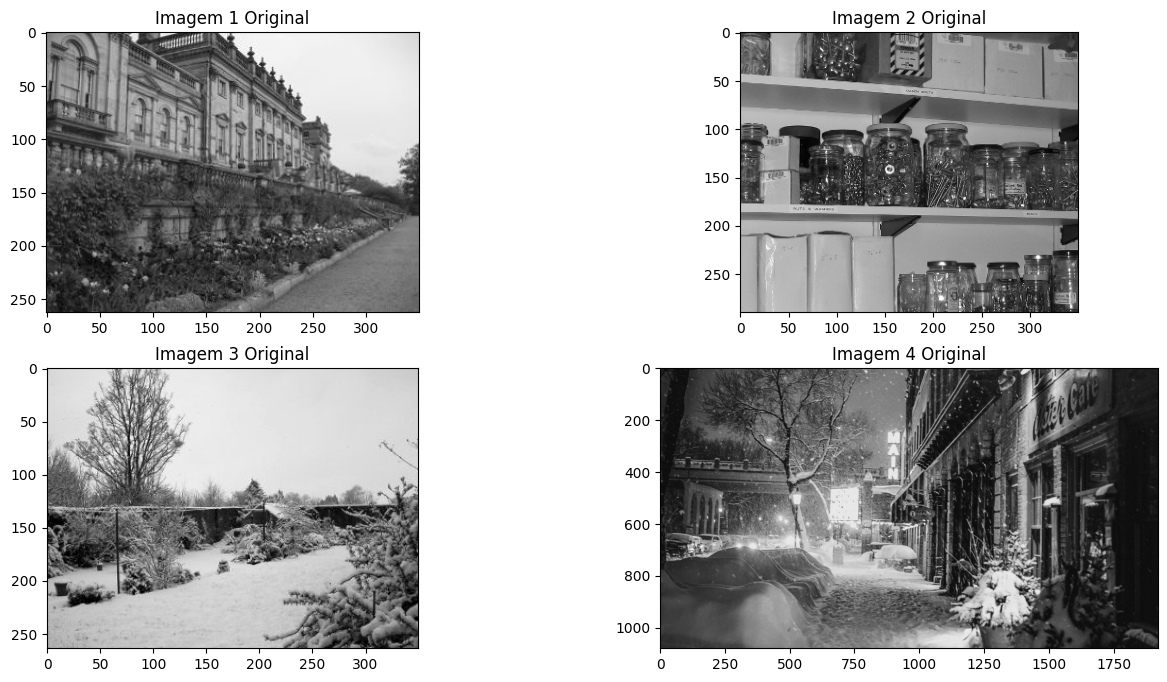

In [1]:
# Importações e definições iniciais

import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('harewood.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('nuts.jpg', cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('snow.jpg', cv2.IMREAD_GRAYSCALE)
img4 = cv2.cvtColor(cv2.imread('img_aluno.jpg'), cv2.COLOR_BGR2GRAY)
    
plt.figure(figsize=(16, 8))
####
plt.subplot(2, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('Imagem 1 Original')
####
plt.subplot(2, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title('Imagem 2 Original')
####
plt.subplot(2, 2, 3)
plt.imshow(img3, cmap='gray')
plt.title('Imagem 3 Original')
####
plt.subplot(2, 2, 4)
plt.imshow(img4, cmap='gray')
plt.title('Imagem 4 Original')
####
plt.show()



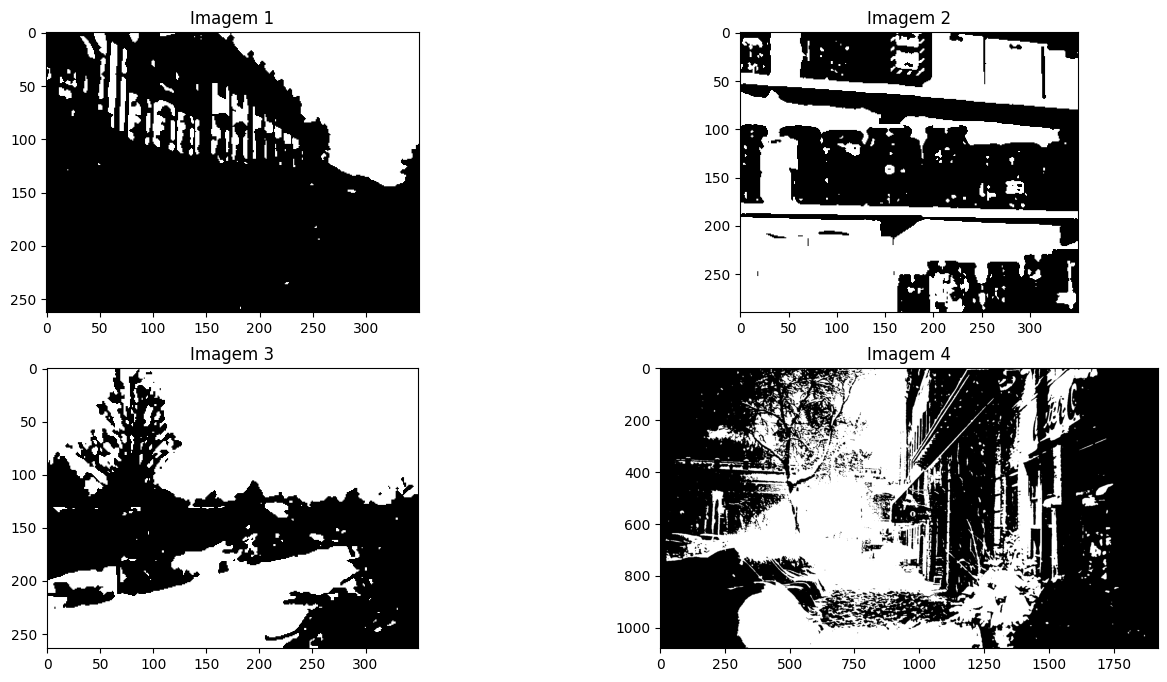

In [2]:
th1 = cv2.threshold(cv2.GaussianBlur(img1, (5, 5), 0), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
th2 = cv2.threshold(cv2.GaussianBlur(img2, (5, 5), 0), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
th3 = cv2.threshold(cv2.GaussianBlur(img3, (5, 5), 0), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
th4 = cv2.threshold(cv2.GaussianBlur(img4, (5, 5), 0), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
#####################################
plt.figure(figsize=(16, 8))
####
plt.subplot(2, 2, 1)
plt.imshow(th1, cmap='gray')
plt.title('Imagem 1')
####
plt.subplot(2, 2, 2)
plt.imshow(th2, cmap='gray')
plt.title('Imagem 2')
####
plt.subplot(2, 2, 3)
plt.imshow(th3, cmap='gray')
plt.title('Imagem 3')
####
plt.subplot(2, 2, 4)
plt.imshow(th4, cmap='gray')
plt.title('Imagem 4')
####
plt.show()

### 2) Considere a pasta de atividade_2 que contém imagens de corpo caloso. Fazer o K-means com objetivo de SEGMENTAR apenas as imagens de corpo caloso. 

Para tanto você terá as imagens de corpo caloso original (com destaque em vermelho da região do corpo caloso. Binarize essas imagen. Depois faça a imagem caloso segmentada pelo k-means para comparar se a segmentação foi boa. 

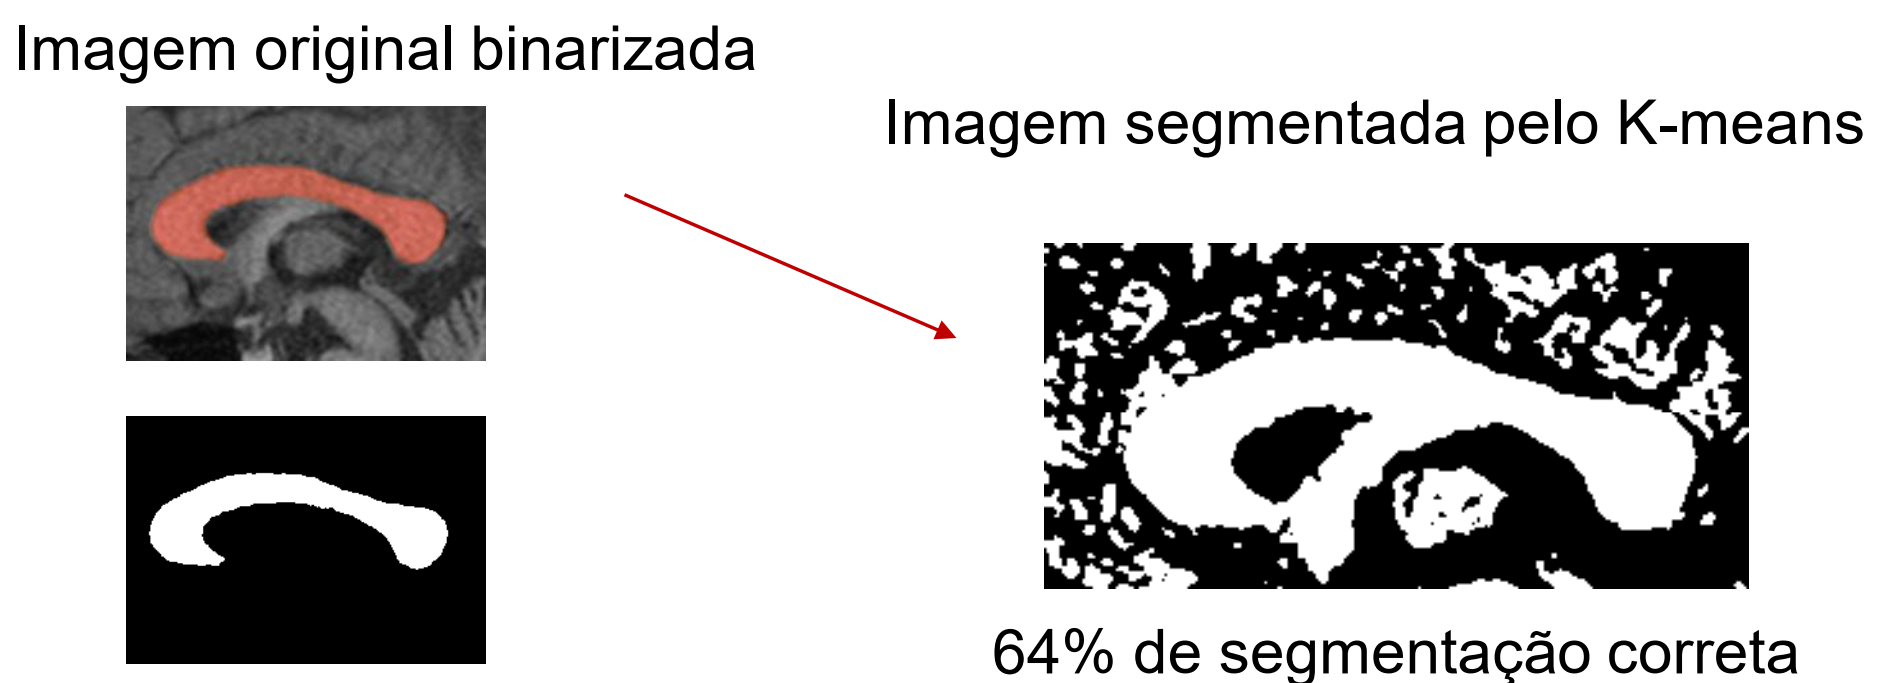

In [3]:
ex2_img1 = cv2.cvtColor(cv2.imread('corpo caloso/Caso_1.png'), cv2.COLOR_BGR2RGB)
ex2_img2 = cv2.cvtColor(cv2.imread('corpo caloso/Caso_2.png'), cv2.COLOR_BGR2RGB)
ex2_img3 = cv2.cvtColor(cv2.imread('corpo caloso/Caso_3.png'), cv2.COLOR_BGR2RGB)
ex2_img4 = cv2.cvtColor(cv2.imread('corpo caloso/Caso_4.png'), cv2.COLOR_BGR2RGB)
ex2_img5 = cv2.cvtColor(cv2.imread('corpo caloso/Caso_5.png'), cv2.COLOR_BGR2RGB)

def get_kmeans(img):
    reshape_prop = (-1,3)
    current_img = img.copy()
    pixel_values = np.float32(current_img.reshape(reshape_prop))

    k = 2
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    centers = np.uint8(centers)
    labels = labels.flatten()

    segmented_image = centers[labels.flatten()].reshape(current_img.shape)
    masked_image = np.copy(current_img).reshape(reshape_prop)
    cluster = labels[np.argmax(segmented_image)]
    masked_image[labels == cluster] = [0,0,0]
    masked_image = masked_image.reshape(current_img.shape)
    return masked_image

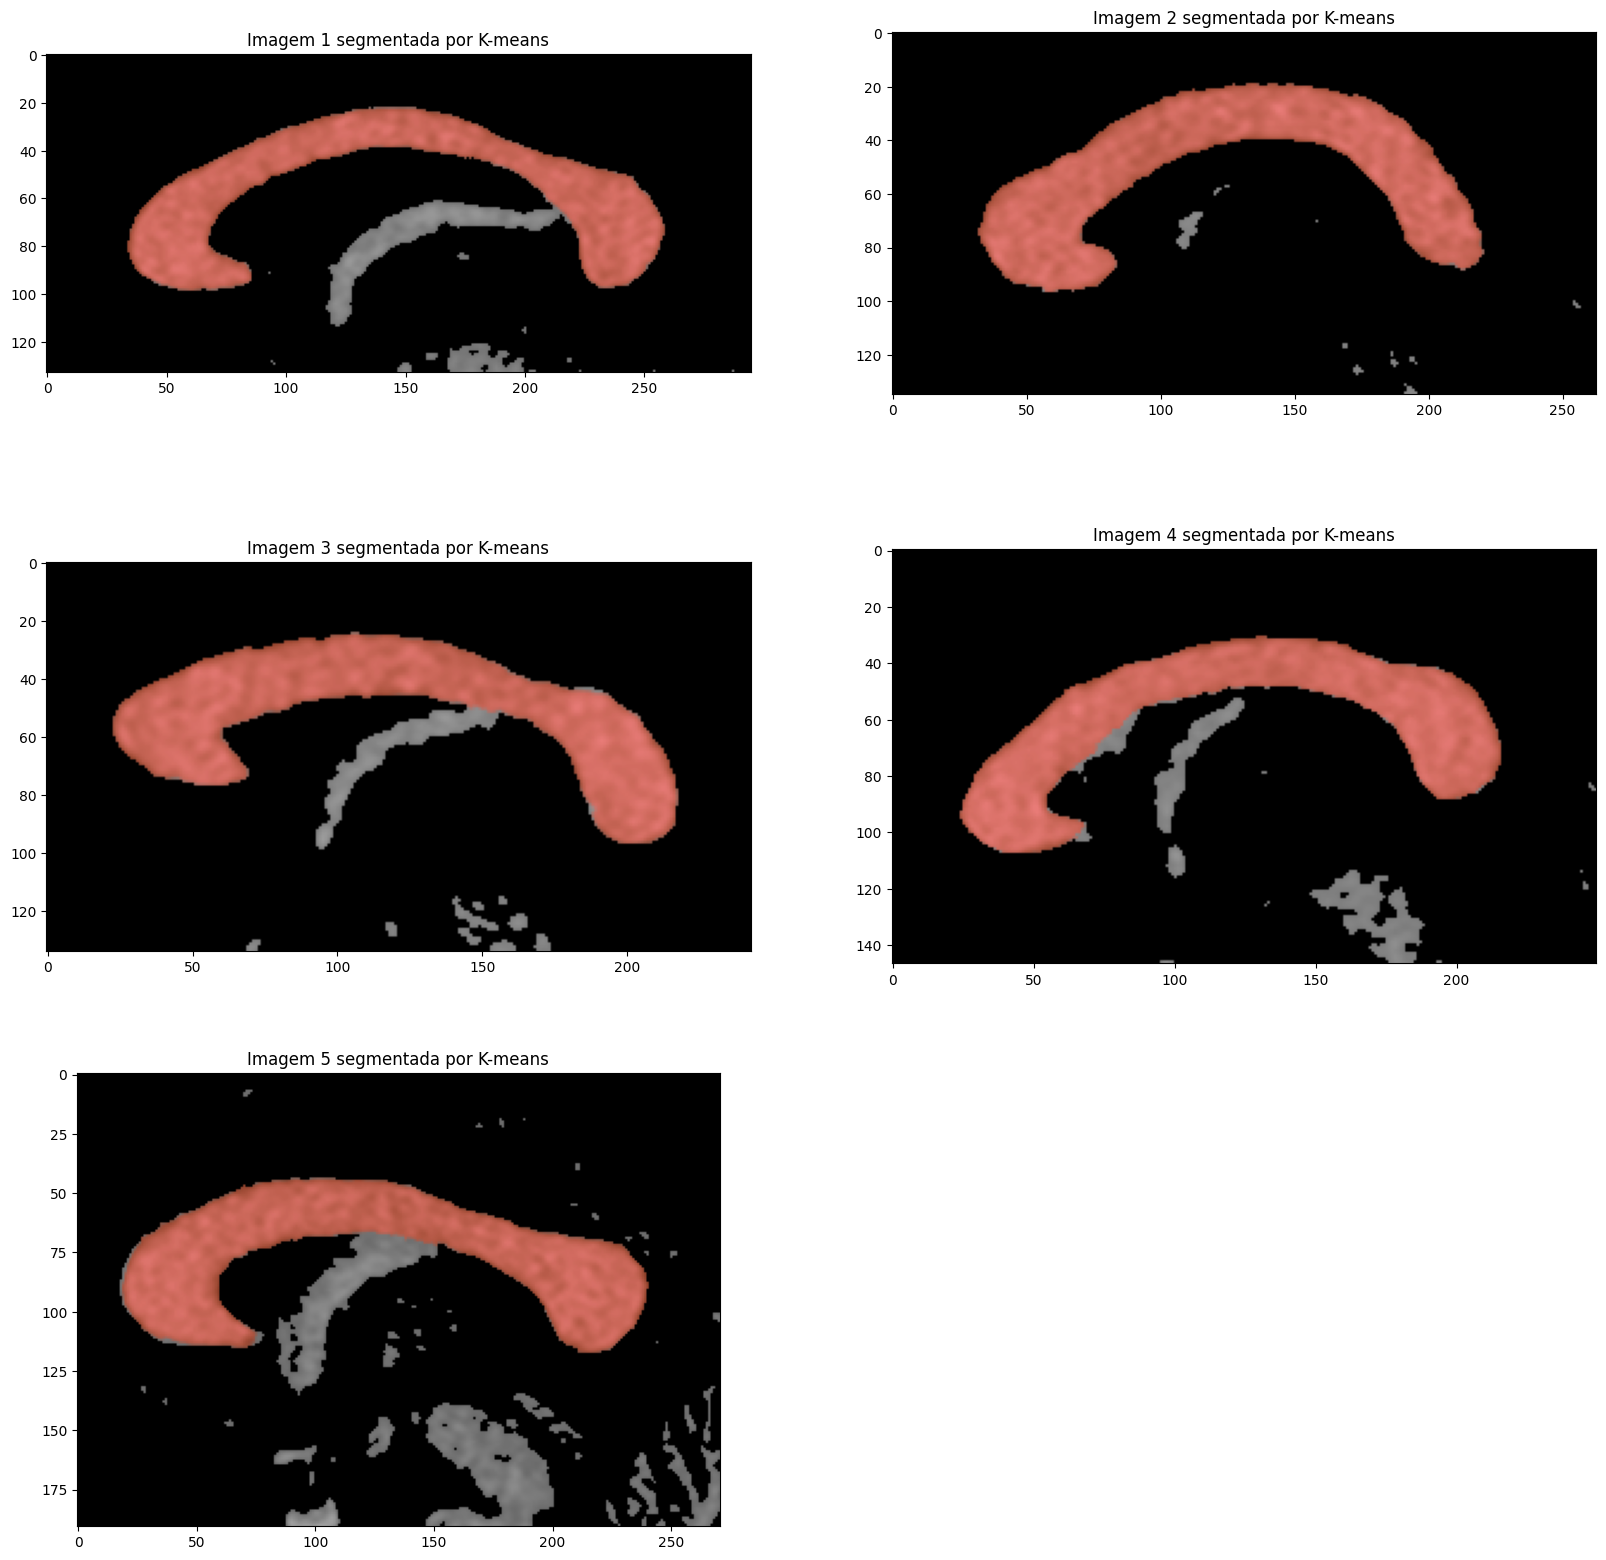

In [4]:
plt.figure(figsize=(20, 20))
####
plt.subplot(3, 2, 1)
plt.imshow(get_kmeans(ex2_img1), cmap='gray')
plt.title('Imagem 1 segmentada por K-means')
####
plt.subplot(3, 2, 2)
plt.imshow(get_kmeans(ex2_img2), cmap='gray')
plt.title('Imagem 2 segmentada por K-means')
####
plt.subplot(3, 2, 3)
plt.imshow(get_kmeans(ex2_img3), cmap='gray')
plt.title('Imagem 3 segmentada por K-means')
####
plt.subplot(3, 2, 4)
plt.imshow(get_kmeans(ex2_img4), cmap='gray')
plt.title('Imagem 4 segmentada por K-means')
####
plt.subplot(3, 2, 5)
plt.imshow(get_kmeans(ex2_img5), cmap='gray')
plt.title('Imagem 5 segmentada por K-means')
####
plt.show()